# ESCI 445 - Programming Exercise 4-5

### Modeling the 1D Advection Equation Using the Forward-in-time, Backward-in-space Scheme

Variables

+ nx: number of x data points
+ ny: number of y data points
+ dx: $\Delta x$, spacing between data points (meters)
+ dt: $\Delta t$, time interval (seconds)
+ c: speed of advection (either wind speed or wave speed)
+ u: parameter being advected
+ u_now: value of <i>u</i> at current time step
+ u_new: value of <i>u</i> at next time step

The 1D advection equation is $\dfrac{\partial u}{\partial t}+c\dfrac{\partial u} {\partial x}=0$.  This notebook will show the steps for how to model this equation using the forward-in-time, backward-in-space scheme for positive values of <i>c</i>.

### Import libraries

In [17]:
import numpy as np   # Import numerical python aliased to np
import matplotlib.pyplot as plt  # Import matplotlib pyplot aliased to plt
from matplotlib import rcParams

### Define fixed model parameters

In [18]:
### 
dx = 1e3  #  Grid spacing in meters
dt = 30.0  # Time interval in seconds
nx = 601   #  Number of grid points
n_total = 500*2  # Final time index at end of simulation
n_save = 10   #  Number of iterations between saves
x = np.arange(0,nx)*dx/1000.0  #  Grid values (in kilometers)

### Define user-specified model parameters

In [19]:
width = 20   #  Signal width in grid points
c = 15.0   # Speed of wave in meters per second
gamma = 0.05

### Define arrays holding the solution values

In [20]:
u_now = np.zeros(nx, dtype = np.float_)  #  Value at current time step
u_next = np.zeros_like(u_now)  #  Value at next time step
u = np.zeros((0, nx), dtype = np.float_)  # define a variable to hold the output values
u_past = np.zeros_like(u_now)
u_ancient = np.zeros_like(u_now)

### Initialize the solution at time zero.

In [21]:
Gaussian = False  # If true, initial data is Gaussian.  Otherwise, it is rectangel

if Gaussian:
    std = 6.0  # number of gridpoints for standard deviation
    arg = ((nx/2-np.arange(0,nx))**2)/(4*std**2)
    u_now[0:nx] = np.exp(-arg)
else:
    width = 20   #  Signal width
    start, stop = int(nx/2) - int(width/2), int(nx/2) + int(width/2)
    u_now[start:stop] = 1.0

u = np.vstack((u, u_now))    #  Saves initial data for output

### <font color = 'blue'>Main loop over time, with nested loop over grid

In [22]:
n = 0
sigma = c*dt/dx  # Defined here so it isn't in the loop


if c>0:
    for i in range (1,nx):
         u_next[i] = u_now[i] - sigma * (u_now[i] - u_now[i-1])
else:
    for i in range(0,nx-1):
        u_next[i] = u_now[i] - sigma * (u_now[i+1] - u_now[i])

u_past = np.copy(u_now)
u_now = np.copy(u_next)

n=1
for i in range (1,nx-1):
    u_next[i] = u_past[i] - sigma*(u_now[i+1] - u_now[i-1])
    
u_past = np.copy(u_now)
u_now = np.copy(u_next)


for n in range(2, n_total): # start of time loop
   
    # Write your code here to loop through the grid
    for i in range(1,nx-1):
        u_next[i] = u_now[i] - (sigma/24) * (23*(u_now[i+1] - u_now[i-1]) - 16 *\
                   (u_past[i+1] - u_past[i-1]) + 5*(u_ancient[i+1] - u_ancient[i-1]))
        
    #apply boundry conditions
    u_next[0] = u_now[0] + (sigma/12) * (23*(u_now[1] - u_now[0]) - 16 *\
                   (u_past[1] - u_past[0]) + 5*(u_ancient[1] - u_ancient[0]))
    
    u_next[-1] = u_now[-1] - (sigma/12) * (23*(u_now[-1] - u_now[-2]) - 16 *\
                   (u_past[-1] - u_past[-2]) + 5*(u_ancient[-1] - u_ancient[-2]))

    #Swap the vars
    
    u_ancient = np.copy(u_past)
    u_past = np.copy(u_now)
    u_now = np.copy(u_next)

    # Prints out amplitude of signal
    print(n+1, np.max(abs(u_now)))
    
    # Save output
    if (n+1) % n_save == 0:
        u = np.vstack((u, u_now))

3 1.3196875
4 1.33243779297
5 1.29295194092
6 1.21687553356
7 1.21981193231
8 1.23279330962
9 1.22486836134
10 1.21662314386
11 1.21964513916
12 1.18526252846
13 1.21982686351
14 1.21229667912
15 1.20305644993
16 1.22128026782
17 1.20257283558
18 1.2154794665
19 1.21866084778
20 1.19922634396
21 1.22173813873
22 1.21107632958
23 1.21484121094
24 1.2215534046
25 1.20037181588
26 1.22276398407
27 1.21510291509
28 1.21646221387
29 1.22330733086
30 1.20414388324
31 1.22432027932
32 1.2169883035
33 1.21926612117
34 1.22445575188
35 1.20915425507
36 1.2260322765
37 1.21752125663
38 1.22248417409
39 1.22502742397
40 1.2145286778
41 1.2275332338
42 1.2169641192
43 1.22558050572
44 1.22492137157
45 1.21969556651
46 1.22853084073
47 1.21539170073
48 1.22818326885
49 1.22402150907
50 1.22427209723
51 1.22880819202
52 1.21718112675
53 1.23003518527
54 1.22223081492
55 1.22799882181
56 1.22821121575
57 1.22299743477
58 1.23096019417
59 1.2194792887
60 1.23070036789
61 1.22663557546
62 1.22766356019

### Save output file for later use.  Output can be viewed separately using the program View-1D.py

In [23]:
np.save('fit-bis', u) # Saves output as NumPy array file

### Plot output

<IPython.core.display.Javascript object>


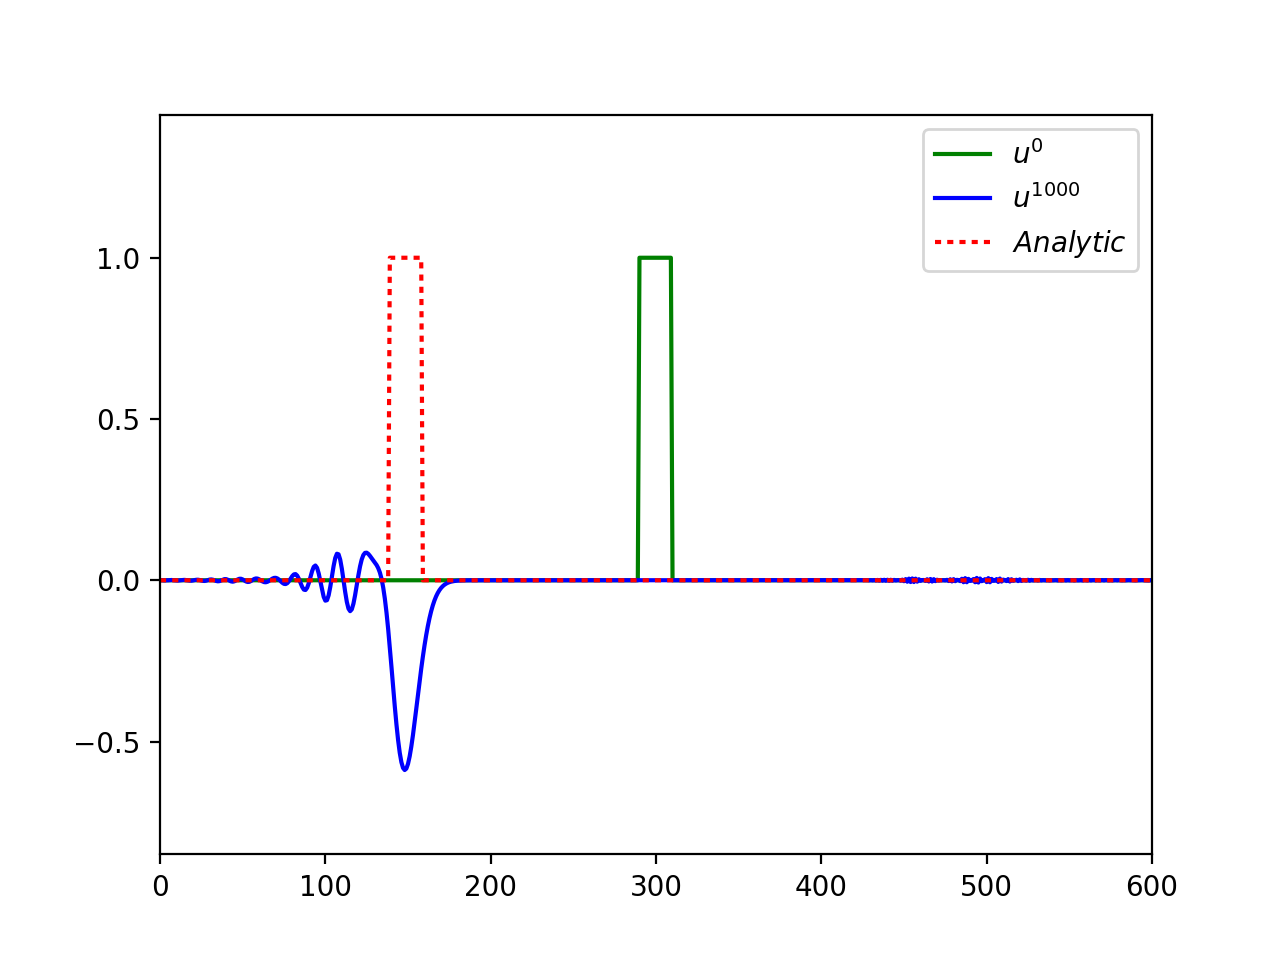

In [24]:
inline = True  # True for inline plot, False for interactive
if inline:
    %matplotlib notebook
else:
    %matplotlib
    
s = r'$u^{' + str(n_total) + r'}$'
plt.plot(x, u[0,:], 'g-',label = r'$u^0$')
plt.plot(x, u[-1,:], 'b-',label = s)
plt.xlim(x[0],x[-1])
umin, umax = np.min(u), np.max(u)
plt.ylim(umin-0.2, umax+0.2)

# Create actual solution for comparison
displacement = c*dt*n_total  # distance signal is displaced
nindex = int(displacement/dx)  # number of grid points signal is displaced
plt.plot(x, np.roll(u[0,:], nindex), 'r:', label = r'$Analytic$')

plt.legend((r'$u^0$', s, r'$Analytic$'), loc = 0)
plt.show()